## IT 456 Final Project: Predicting Wildfires

This dataset relates to the occurrence of wild fires, and has already been preprocessed to remove noise and correct inconsistencies, so you will not need to do that. 
This data, collected by NASA using remote sensors, contains parameters with high influence on the occurrence of wildfires. 

The dataset has four columns:
1. **NDVI:** Normalized Difference Vegetation Index, which relates to crop conditions 
2. **LST:** Land Surface Temperature 
3. **BURNED_AREA:** Values related to thermal anomalies
4. **CLASS:** This fourth column contains one of the two categories to predict: fire or no_fire. 

The first 3 columns are predictors, and they are all numeric. There is no missing data. The fourth column has string values, so you'll need to change those to numbers. There are only 1713 rows. Each row contains the three predictors and the category to predict.

The data covers multiple zones of approximately 2 million hectares located in the center of Canada. Canada's forests were chosen because this area is known for its high rate of wildfires and also for the availability of fire data from the Canadian Wild-land Fire Information System (CWFIS) which creates daily fire weather and fire behavior maps year-round and hot spot maps throughout the forest fire season.


## General Guidelines:
### You may need to do a web search or read some of the scikit-learn documentation to learn how to do some of these things.

1. Read the data into a pandas dataframe. You have already done this in Assignment 4.
2. Create a 2 graphs to help you visualize the data, e.g. to see how it is distributed.
3. Use scikit-learn's train_test_split to split the data into training and test datasets, using **40%** of the data for testing. Make sure that your create and set the following 4 variables: X_train, X_test, y_train, y_test 
4. After splitting the data, use scikit-learn's LabelEncoder to convert the string values of y_train and y_test to 0 and 1 (for 'fire' and 'no_fire', respectively). Since you have not done this previously, I do part of it for you in a code cell at the bottom. The comments there will tell you how to finish it.
5. Be sure to standardize the *predictor* columns using StandardScaler or you will encounter lots of difficulties. You have already done this in assignment 2.
6. You must build at least 3 classifiers with different algorithms. It is possible to achieve better than 98% accuracy on this dataset, but the main thing for this class is for you to get some experience doing a complete analysis of a dataset. So don't worry if you are not even close to 98%. However, if you get really horrible results, then you have likely done something wrong, so you should take a closer look. It should not be very difficult for you to get over 70%.
7. For each model, be sure to compute and display the accuracy of your model.
8. For each classifier model that you build, show both a Count based confusion matrix and a proportions based confusion matrix. You have already done this in Assignment 3.
9. Pick one of your models and try to improve it by using grid search with cross validation on 2 hyperparameters. You have already done grid search on one hyperparameter in Assignment 2, but this time you need to add a second hyperparameter to the grid dictionary.
10. Add your own observations per instructions below in the next cell.

#### 280 Points, broken down as follows:

1. 10 points: Loading the data into a dataframe.
2. 30 points: Performing your initial data visualizations (15 points each graph).
3. 10 points: Splitting data into training and test sets.
4. 10 points: Encoding y_train and y_test as numbers
5. 10 points: Standardizing the training and test data correctly.
6. 90 points  Building the 3 classifiers (30 points for each model)
7. 30 points: Evaluating the overall accuracy of each model (10 points each)
8. 30 points: Creating two confusion matrices for each model. (10 points each model)
9. 50 points: Performing grid search to improve one of your models. Be very careful not to select too many values for each hyperparameter nor too many 'folds' for your cross validation, otherwise you may be waiting an extraordinary amount of time to complete this task.
10. 10 points: Use the markdown cell I created below and describe to me (a) if you have observed anything strange when you look at your graphs, and (b) how you think you might be able to build a better model if you had more time. If you don't notice anything strange, don't worry about it. You'll get the 10 points if you simply answer part (b).

### Extra credit opportunities:

While there are 280 available points for this project, you can still earn an extra 20 points for going above and beyond the requirements listed above. For example, you could build more than 3 models; you could try adding some regularization techniques; you could do some additional data visualizations, e.g. ROC; you could conpute more metrics such as precision, recall, and F1-score; you could do something else that interests you and surprises me!


### Put your comments in here for Task 10 described above.
A) The first thing I noticed about my graphs was how unbalanced the data classes were and there is no clear separation. 

B) If I had more time, I would investigate whether the data could be split using some feature engineering techniques and whether it could be split on a different plane. I would also try more cross-validation options on the other models to see if finetuning the parameters of the other classification models is.

In [7]:
# Here are 2 of the imports you will need, but you will have to add several more

import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing   import LabelEncoder, StandardScaler
from sklearn.ensemble        import RandomForestClassifier
from sklearn.svm             import SVC
from sklearn.neural_network  import MLPClassifier
from sklearn.metrics         import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree            import plot_tree


In [8]:
# Load data into notebook 
wildfires = pd.read_csv("WildFires_DataSet.csv")

# Show the first 5 rows of the data 
wildfires.head()

,NDVI,LST,BURNED_AREA,CLASS
0,0.506782,14584.272727,4.692308,no_fire
1,0.522150,14655.833333,5.000000,no_fire
2,0.682284,14780.000000,5.000000,fire
3,0.120046,13298.500000,3.500000,no_fire
4,0.568734,14743.000000,5.000000,no_fire


In [9]:
# Descriptive statistics
wildfires.describe()

,NDVI,LST,BURNED_AREA
count,1713.000000,1713.000000,1713.000000
mean,0.555665,14622.802073,4.674973
std,0.092847,366.927861,0.583791
min,0.030735,13137.000000,3.000000
25%,0.501276,14406.000000,4.521951
50%,0.565181,14645.750000,4.920635
75%,0.620987,14881.300000,5.000000
max,0.781723,15611.570513,9.000000


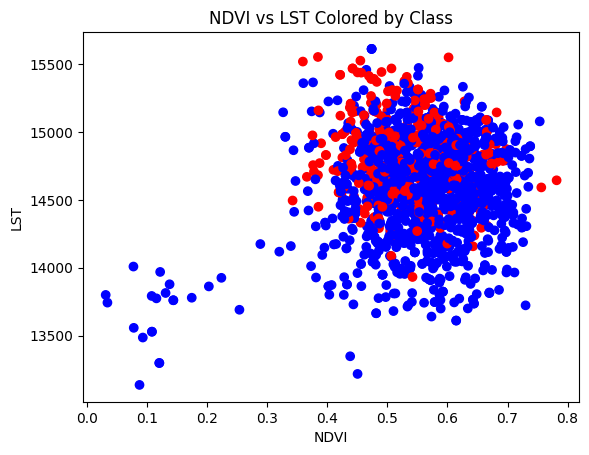

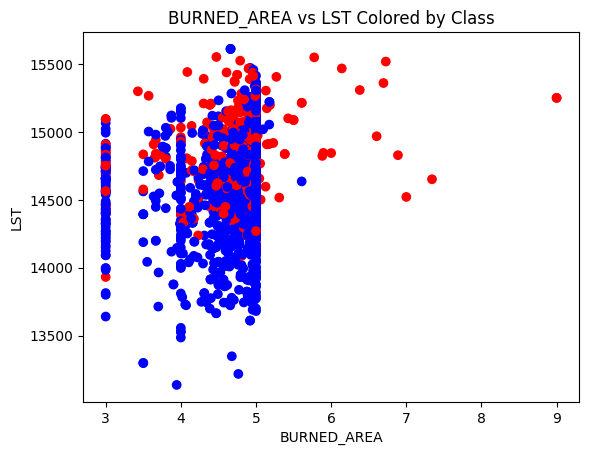

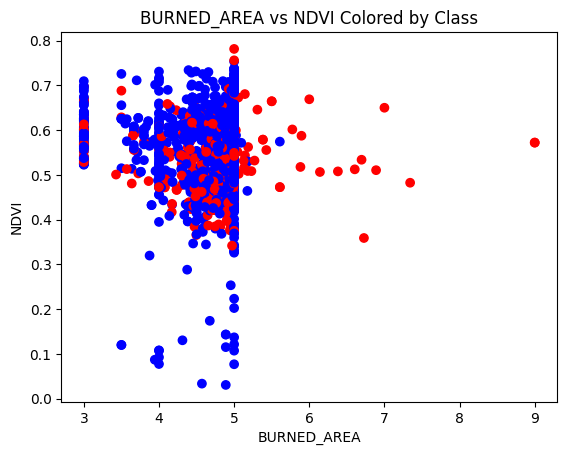

In [10]:
# Create pairs of features for scatter plot visuals
feature_pairs = [
    ('NDVI', 'LST'),
    ('BURNED_AREA', 'LST'),
    ('BURNED_AREA', 'NDVI')
]

# Create the scatter plots using a loop
colors = {'fire': 'red', 'no_fire': 'blue'} # create colors for plot
for x_feature, y_feature in feature_pairs:
    plt.figure()  # Create a new figure for each plot
    plt.scatter(wildfires[x_feature], wildfires[y_feature], c=[colors[c] for c in wildfires['CLASS']])
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.title(f'{x_feature} vs {y_feature} Colored by Class')
    plt.show()

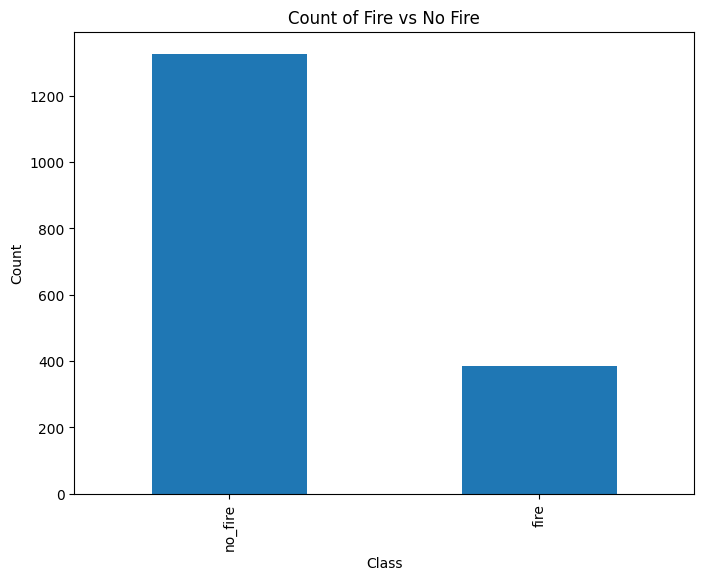

In [11]:
# Create a bar chart to see how many counts of fire VS no fire there is in the dataset 
plt.figure(figsize=(8, 6))
wildfires['CLASS'].value_counts().plot(kind='bar')
plt.title('Count of Fire vs No Fire')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [12]:
# Split the data into X and Y variables 
X = wildfires[['NDVI','LST','BURNED_AREA']]
y=wildfires['CLASS']

# Split the data into training and test datasets 
X_train, X_test, y_train,y_test = train_test_split(X, y, train_size=.40, random_state=42)

#Show how many rows are in train and test datasets
print('Training data shape:\t',   X_train.shape) 
print('Training labels shape:\t', y_train.shape)

print('Test data shape:\t',       X_test.shape)
print('Test labels shape:\t',     y_test.shape)
print()

Training data shape:	 (685, 3)
Training labels shape:	 (685,)
Test data shape:	 (1028, 3)
Test labels shape:	 (1028,)



In [13]:
# Here is PART of what you need to do for task 4 described above.
# Encode labels as numbers

print('The current value of y_test is:\n', y_test)

le = LabelEncoder()
le.fit(["fire", "no_fire"])

# Now you need to finish the next two lines of code
# by calling the transform method of 'le' on both 
# y_train and y_test and saving the results back
# into those variables. The final print statement 
# should then show you a big list of zeros and ones.
# If you don't see that, then investigate a bit more
# to see how to resolve it.

y_train = le.fit_transform(y_train)
y_test  = le.transform(y_test)

print('\nThe new value of y_test is:\n', y_test)

The current value of y_test is:
 651     no_fire
1124       fire
1648    no_fire
405     no_fire
534        fire
         ...   
862     no_fire
1142       fire
1102    no_fire
1356    no_fire
1274    no_fire
Name: CLASS, Length: 1028, dtype: object

The new value of y_test is:
 [1 0 1 ... 1 1 1]


In [14]:
print('The current value of X_test is:\n', X_test)

# Scale predictors 
standScale = StandardScaler()
X_train = standScale.fit_transform(X_train)
X_test = standScale.transform(X_test)

# make sure the scaling took place for the predictors no issue
print('The current value of X_test is:\n', X_test)

The current value of X_test is:
           NDVI           LST  BURNED_AREA
651   0.623532  14266.000000     3.000000
1124  0.578036  15143.333333     5.000000
1648  0.481193  13664.954545     4.470732
405   0.631953  14908.374563     4.440950
534   0.579681  14953.000000     5.000000
...        ...           ...          ...
862   0.532194  14633.000000     3.000000
1142  0.550893  15313.000000     5.000000
1102  0.622957  14428.565288     4.717620
1356  0.433514  14791.538217     4.756356
1274  0.607120  14926.000000     5.000000

[1028 rows x 3 columns]
The current value of X_test is:
 [[ 0.73137276 -0.98062513 -2.796981  ]
 [ 0.242494    1.49110811  0.52717474]
 [-0.79813564 -2.67396559 -0.35250989]
 ...
 [ 0.72519408 -0.52262586  0.05783719]
 [-1.3104719   0.49998689  0.12221944]
 [ 0.55501708  0.87880945  0.52717474]]


In [15]:
# Convert transformed X variables back to dataframes 
X_train_df  = pd.DataFrame(X_train, columns=['NDVI','LST','BURNED_AREA'])
X_test_df   = pd.DataFrame(X_test , columns= ['NDVI','LST','BURNED_AREA'])

# Make sure conversion works 
print(X_test_df)


          NDVI       LST  BURNED_AREA
0     0.731373 -0.980625    -2.796981
1     0.242494  1.491108     0.527175
2    -0.798136 -2.673966    -0.352510
3     0.821861  0.829153    -0.402010
4     0.260170  0.954877     0.527175
...        ...       ...          ...
1023 -0.250103  0.053333    -2.796981
1024 -0.049172  1.969114     0.527175
1025  0.725194 -0.522626     0.057837
1026 -1.310472  0.499987     0.122219
1027  0.555017  0.878809     0.527175

[1028 rows x 3 columns]


In [16]:
# Create first model Random Forest Classifier 

# Build the Random Forest Classifier random state 42, number of estimators 1000, with njobs -1 to speed up the processing  
rfClassifier = RandomForestClassifier(random_state=42, n_jobs=-1,n_estimators=500)

# Train Random Forest classifier
rfClassifier.fit(X_train_df, y_train)

# Predict the Test data
testPreds_rf = rfClassifier.predict(X_test_df)
# Score the Random Forest Classifier
testScore_rf = rfClassifier.score(X_test_df,y_test)

# Print the Random Forest Classifier score
print('The score on the test data for the Random Forest Classifier is:\t\t', testScore_rf, '\n')

# Calculate classification_report for SVM Classifier
print(classification_report(y_test, testPreds_rf, target_names=['Fire', 'No Fire']))

The score on the test data for the Random Forest Classifier is:		 0.8093385214007782 

              precision    recall  f1-score   support

        Fire       0.64      0.38      0.48       236
     No Fire       0.84      0.94      0.88       792

    accuracy                           0.81      1028
   macro avg       0.74      0.66      0.68      1028
weighted avg       0.79      0.81      0.79      1028



In [17]:
# Create the second model SVC

# Instanciate the SVC model 
svmClassifier = SVC(random_state=42)

# Train the model 
svmClassifier.fit(X_train_df, y_train)

# Predict the test data
testPreds_svm = svmClassifier.predict(X_test_df)

# Score the model on the test data
testScore_svm = svmClassifier.score(X_test_df,y_test)

# Print the score for the SVC model 
print('The score on the test data for the Support Vector Classifier is:\t\t', testScore_svm,'\n')

# Calculate classification_report for SVM Classifier
print(classification_report(y_test, testPreds_svm, target_names=['Fire', 'No Fire']))

The score on the test data for the Support Vector Classifier is:		 0.7782101167315175 

              precision    recall  f1-score   support

        Fire       0.67      0.07      0.12       236
     No Fire       0.78      0.99      0.87       792

    accuracy                           0.78      1028
   macro avg       0.72      0.53      0.50      1028
weighted avg       0.75      0.78      0.70      1028



In [52]:
# Create the third model 

# Instaciate Neural Network with lbfgs solver and two hidden layers and random state 42
neuralNet = MLPClassifier(solver='adam',
                    hidden_layer_sizes=(7,5,5,2), random_state=42)

neuralNet.fit(X_train_df, y_train)

# Predict the test data
testPreds_neuralNet = neuralNet.predict(X_test_df)

# Score the model on the test data
testScore_neuralNet = neuralNet.score(X_test_df,y_test)

# Print the score for the SVC model 
print('The score on the test data for the Neural Network is:\t\t', testScore_neuralNet)

# Calculate classification_report for SVM Classifier
print(classification_report(y_test, testPreds_neuralNet, target_names=['Fire', 'No Fire']))

The score on the test data for the Neural Network is:		 0.7704280155642024
              precision    recall  f1-score   support

        Fire       0.00      0.00      0.00       236
     No Fire       0.77      1.00      0.87       792

    accuracy                           0.77      1028
   macro avg       0.39      0.50      0.44      1028
weighted avg       0.59      0.77      0.67      1028



C:\Users\wilbu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\wilbu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\wilbu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest - Confusion Matrix: Counts
[[ 90 146]
 [ 50 742]]
Random Forest - Confusion Matrix: Proportions
[[0.38135593 0.61864407]
 [0.06313131 0.93686869]]


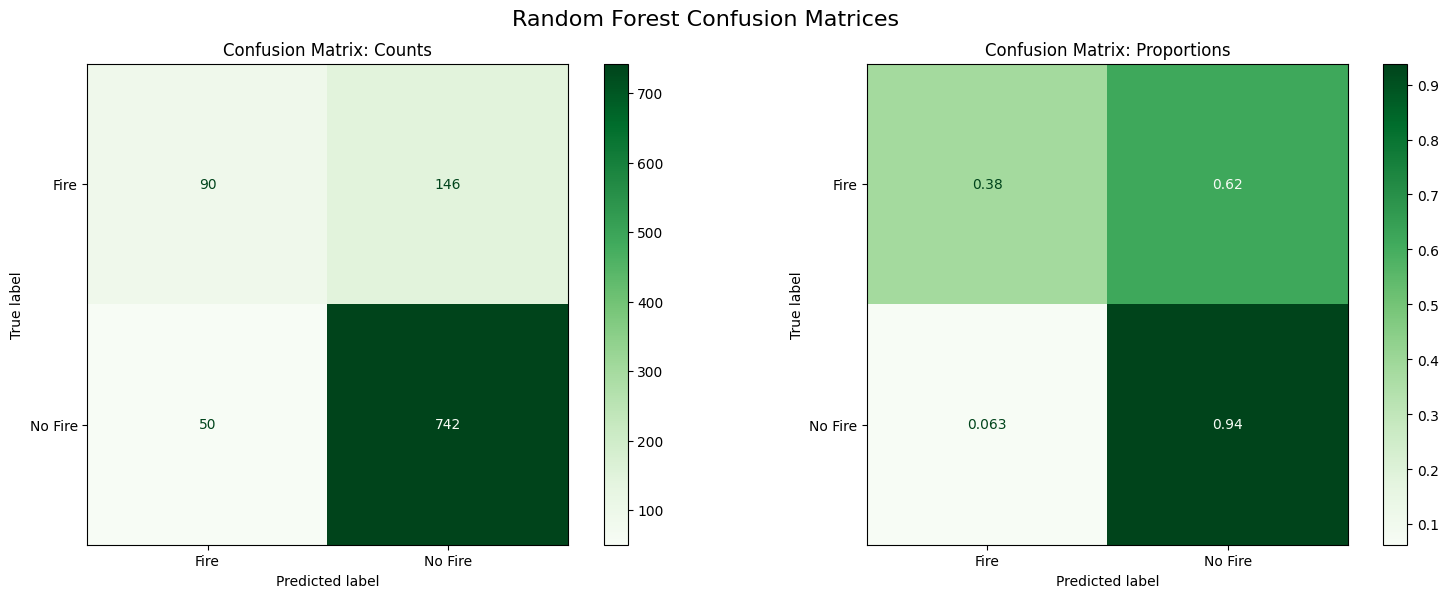

Support Vector Machine - Confusion Matrix: Counts
[[ 16 220]
 [  8 784]]
Support Vector Machine - Confusion Matrix: Proportions
[[0.06779661 0.93220339]
 [0.01010101 0.98989899]]


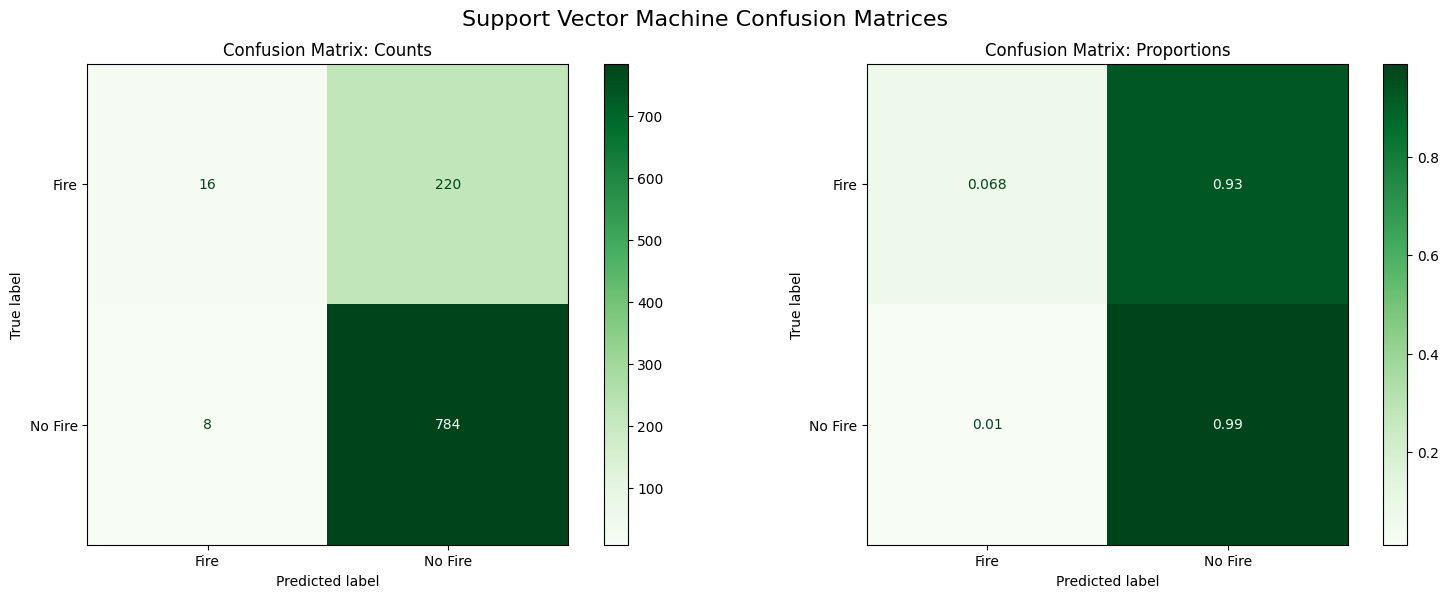

Nueral Network - Confusion Matrix: Counts
[[  0 236]
 [  0 792]]
Nueral Network - Confusion Matrix: Proportions
[[0. 1.]
 [0. 1.]]


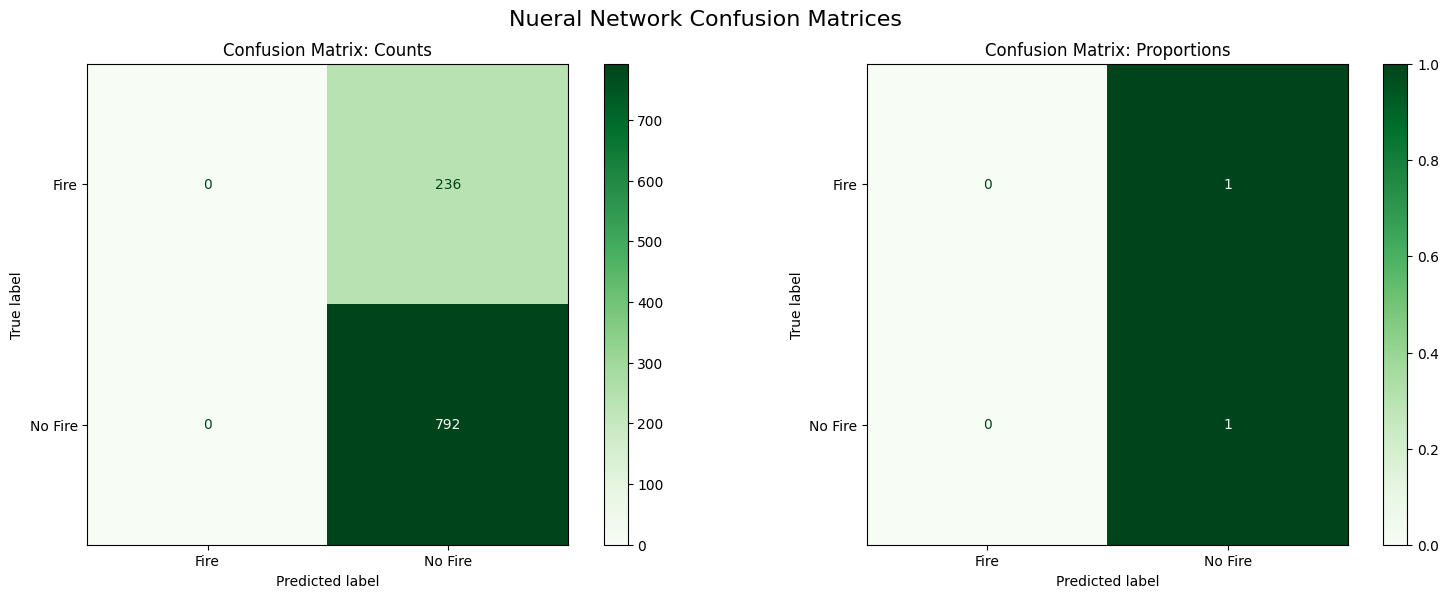

In [19]:
# Confusion Matrix 

# Create model list for the plots
models = [
    (rfClassifier, "Random Forest"),
    (svmClassifier, "Support Vector Machine"),
    (neuralNet, "Nueral Network")
]

# Create titles and normalization variable
titles_and_norms = [
    ("Confusion Matrix: Counts", None),
    ("Confusion Matrix: Proportions", 'true')
]

# Create plots for confusion matrix for each model
for model, model_name in models:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(f"{model_name} Confusion Matrices", fontsize=16)
    
    for (title, norm), ax in zip(titles_and_norms, axes):
        disp = ConfusionMatrixDisplay.from_estimator(
            estimator=model,
            X=X_test_df,
            y=y_test,
            display_labels=['Fire', 'No Fire'],
            normalize=norm,
            cmap= "Greens",
            ax=ax
        )
        disp.ax_.set_title(f"{title}")
        print(f"{model_name} - {title}")
        print(disp.confusion_matrix)
    
    plt.tight_layout()
    plt.show()

In [20]:
# Use GridSearch to fine-tune the random forest classification model with 10 crossfolds 
# Define the parameter grid
param_grid = {
    'n_estimators': [300, 500, 700],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a random forest classifier
rf = RandomForestClassifier(random_state=42)

# Create the grid search object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to your data
grid_search.fit(X_train_df, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters found: ", best_params)
print("Best cross-validation score:" ,best_score)


Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Best parameters found:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Best cross-validation score: 0.8204816709292413


Best Random Forest Confusion Matrix: Counts
[[ 79 157]
 [ 48 744]]
Best Random Forest Confusion Matrix: Proportions
[[0.33474576 0.66525424]
 [0.06060606 0.93939394]]


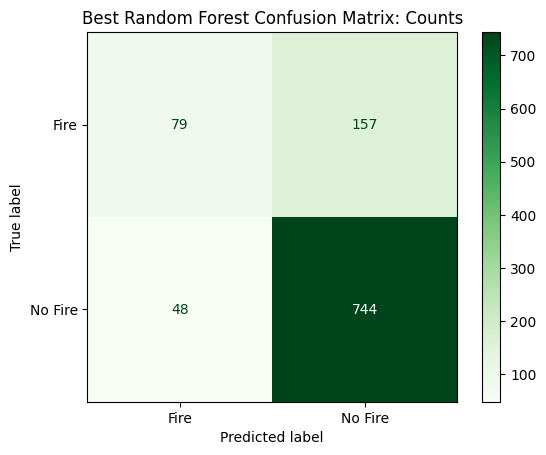

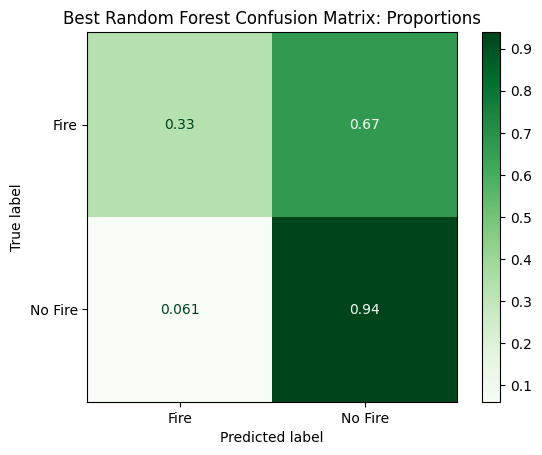

In [21]:
# Use the best model to make predictions on the test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test_df)

# Print the new confusion matrix
titles_and_norms = [
    ("Best Random Forest Confusion Matrix: Counts",      None),
    ("Best Random Forest Confusion Matrix: Proportions", 'true')]

for title, norm in titles_and_norms:
    disp = ConfusionMatrixDisplay.from_estimator(estimator=best_rf, 
                                                 X=X_test_df, 
                                                 y=y_test, 
                                                 display_labels=('Fire', 'No Fire'), 
                                                 normalize=norm,
                                                cmap="Greens")    
    
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

plt.show()

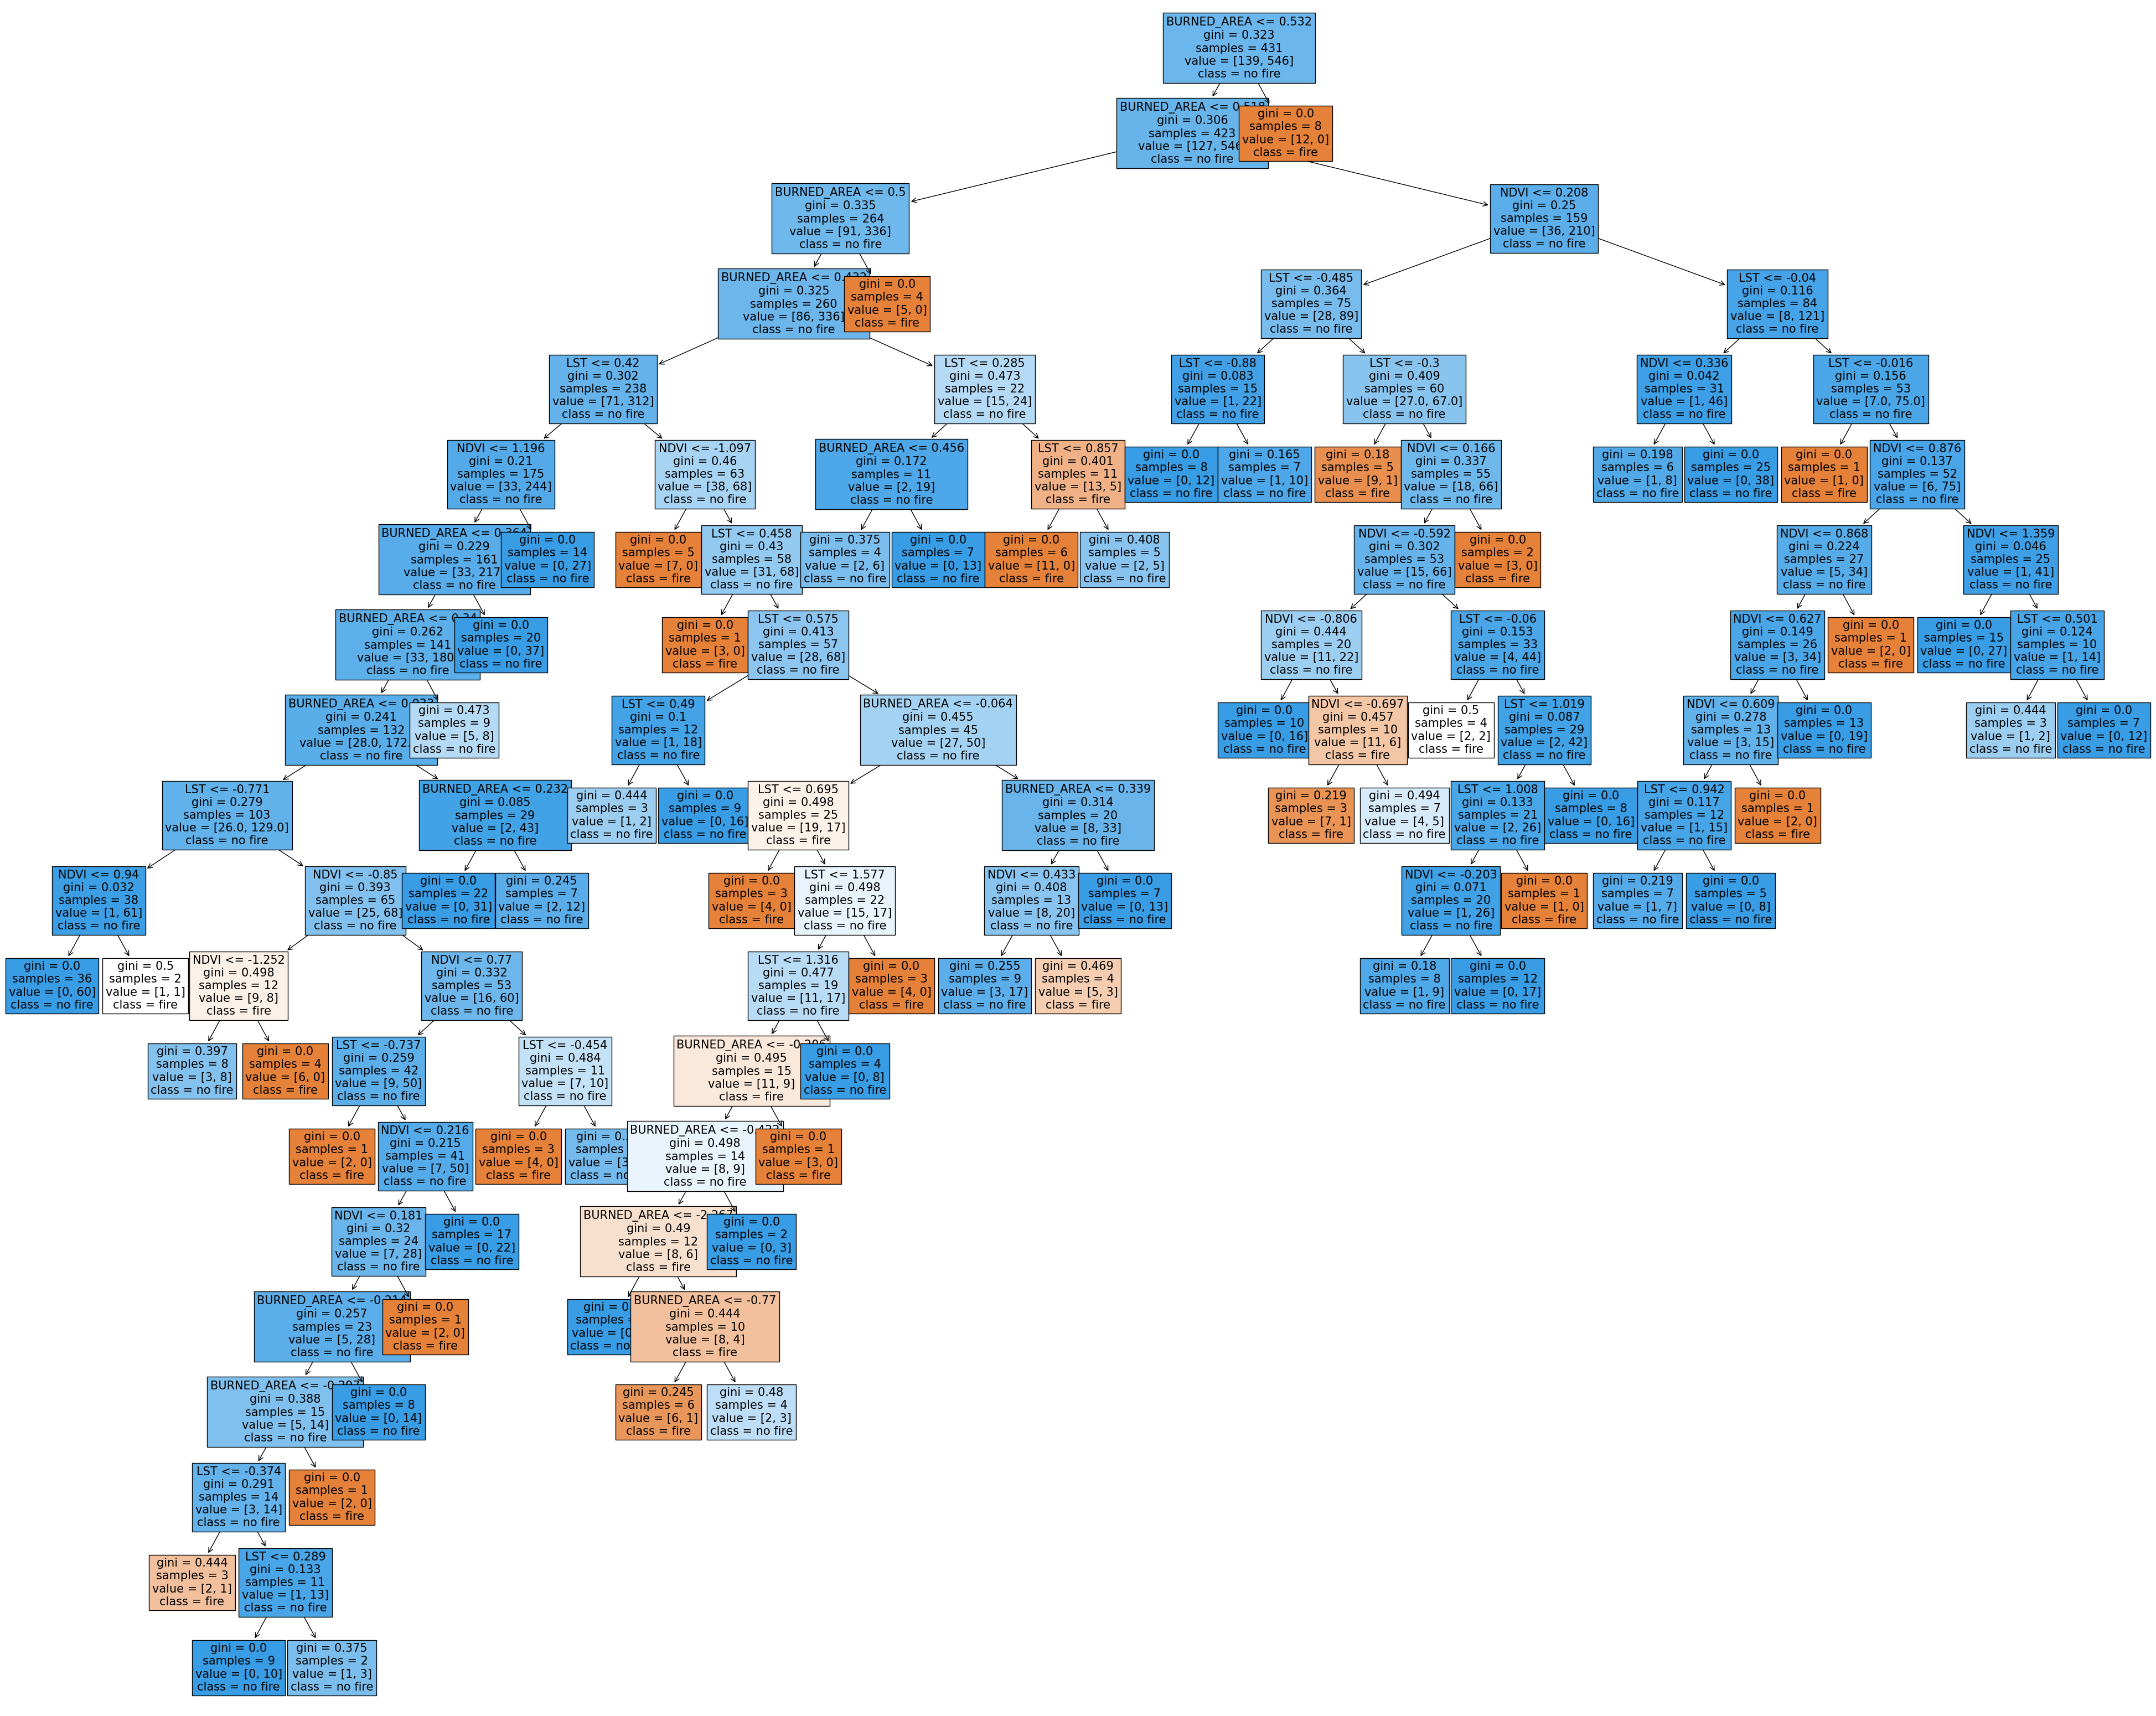

In [22]:
#Visulize one tree from the forest

# Extract the first tree
tree = best_rf[1]

#Plot tree
plt.figure(figsize=(50, 40))  
plot_tree(tree, filled=True, fontsize=15,
          class_names=["fire", "no fire"],  
          feature_names=['NDVI','LST','BURNED_AREA'])  
plt.show()